# PCA Playbook

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
import pandas as pd

In [3]:
cancer = load_breast_cancer()

cancer.data
cancer.target
cancer.feature_names

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['benign'] = cancer.target

target = 'benign'
y = df[target]
X = df.drop(target, axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

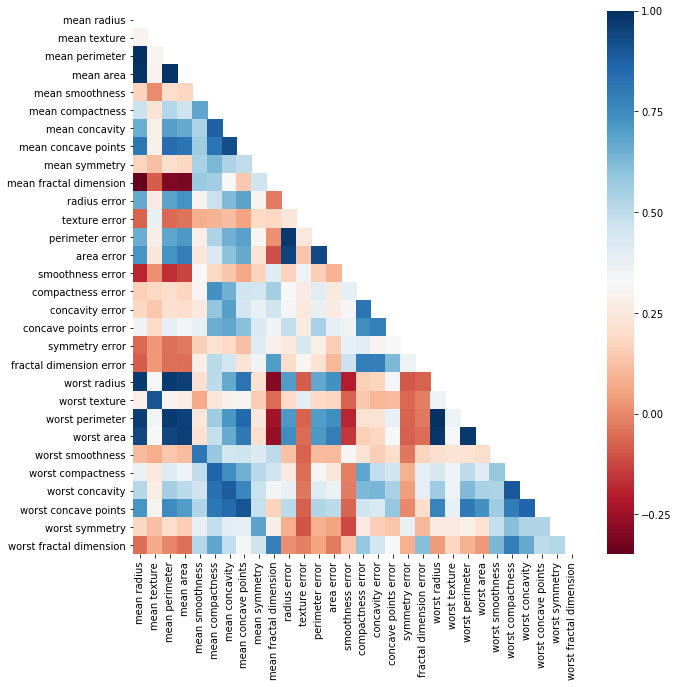

In [4]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

mask = np.zeros_like(X_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(X_train.corr(), mask=mask, cmap='RdBu')

In [5]:
from sklearn.decomposition import PCA

np.set_printoptions(suppress=True)

pca = PCA(n_components=5)
pca.fit(X_train)
pca.explained_variance_ratio_

Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(Z_train, y_train)
model.score(Z_test, y_test)

model.fit(X_train, y_train)
model.score(X_test, y_test)

from sklearn.pipeline import make_pipeline 

pipe = make_pipeline(pca, model)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

Z_train.shape

(426, 5)